In [2]:
from env import BernoulliBanditsEnv
import stable_baselines3 as sb3
import numpy as np


env = BernoulliBanditsEnv(
    min_turns=10,
    max_turns=1000,
    arms=2,
    prior=lambda arms: np.linspace(0.1, 0.9, arms),
)

agents = {
    # "A2C": sb3.A2C,
    "PPO": sb3.PPO,
    # "DQN": sb3.DQN,
}

In [3]:
for name, agent in agents.items():
    obs = env.reset()
    model = agent("MlpPolicy", env, verbose=1)
    model.learn(total_timesteps=100_000)

    obs = env.reset()
    done = False
    while not done:
        action, _ = model.predict(obs)
        obs, result, done, info = env.step(action)
        print(info["turn"], info["p_list"], action, info["times_pulled"])

/Users/boyesjo/NTH/tma4900/code/sb3_v_qnns/env.py:47: RuntimeWarning: invalid value encountered in divide
  means = self.results / self.times_pulled
/Users/boyesjo/NTH/tma4900/code/sb3_v_qnns/env.py:49: RuntimeWarning: invalid value encountered in divide
  counts = self.times_pulled / self.times_pulled.sum()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | 490      |
| time/              |          |
|    fps             | 4704     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 540         |
| time/                   |             |
|    fps                  | 3143        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.020045226 |
|    clip_fraction        | 0.401       |
|    clip_range           | 0.2         |
|    entropy_loss   

In [4]:
obs = env.reset()
done = False
while not done:
    action, _ = model.predict(obs)
    obs, result, done, info = env.step(action)
    print(info["turn"], info["p_list"], action, info["times_pulled"])
    done = info["turn"] > 10_000

0 [0.1 0.9] 1 [0 1]
1 [0.1 0.9] 1 [0 2]
2 [0.1 0.9] 1 [0 3]
3 [0.1 0.9] 1 [0 4]
4 [0.1 0.9] 1 [0 5]
5 [0.1 0.9] 1 [0 6]
6 [0.1 0.9] 1 [0 7]
7 [0.1 0.9] 1 [0 8]
8 [0.1 0.9] 1 [0 9]
9 [0.1 0.9] 1 [ 0 10]
10 [0.1 0.9] 1 [ 0 11]
11 [0.1 0.9] 1 [ 0 12]
12 [0.1 0.9] 1 [ 0 13]
13 [0.1 0.9] 1 [ 0 14]
14 [0.1 0.9] 1 [ 0 15]
15 [0.1 0.9] 1 [ 0 16]
16 [0.1 0.9] 1 [ 0 17]
17 [0.1 0.9] 1 [ 0 18]
18 [0.1 0.9] 1 [ 0 19]
19 [0.1 0.9] 1 [ 0 20]
20 [0.1 0.9] 1 [ 0 21]
21 [0.1 0.9] 1 [ 0 22]
22 [0.1 0.9] 1 [ 0 23]
23 [0.1 0.9] 1 [ 0 24]
24 [0.1 0.9] 1 [ 0 25]
25 [0.1 0.9] 1 [ 0 26]
26 [0.1 0.9] 1 [ 0 27]
27 [0.1 0.9] 1 [ 0 28]
28 [0.1 0.9] 1 [ 0 29]
29 [0.1 0.9] 1 [ 0 30]
30 [0.1 0.9] 1 [ 0 31]
31 [0.1 0.9] 1 [ 0 32]
32 [0.1 0.9] 1 [ 0 33]
33 [0.1 0.9] 1 [ 0 34]
34 [0.1 0.9] 1 [ 0 35]
35 [0.1 0.9] 1 [ 0 36]
36 [0.1 0.9] 1 [ 0 37]
37 [0.1 0.9] 1 [ 0 38]
38 [0.1 0.9] 1 [ 0 39]
39 [0.1 0.9] 1 [ 0 40]
40 [0.1 0.9] 1 [ 0 41]
41 [0.1 0.9] 1 [ 0 42]
42 [0.1 0.9] 1 [ 0 43]
43 [0.1 0.9] 1 [ 0 44]
44 [0.1 0.9] 1 [

In [5]:
# play 100 times, save and plot regret
import matplotlib.pyplot as plt

turns = 20_000
N = 10

regrets = np.zeros((N, turns + 1))

for i in range(N):
    regret = np.zeros(turns + 1)
    obs = env.reset()
    done = False
    while not done:
        action, _ = model.predict(obs)
        obs, result, done, info = env.step(action)
        regret[info["turn"] - 1] = info["regret"]
        done = info["turn"] > turns
    regrets[i] = regret

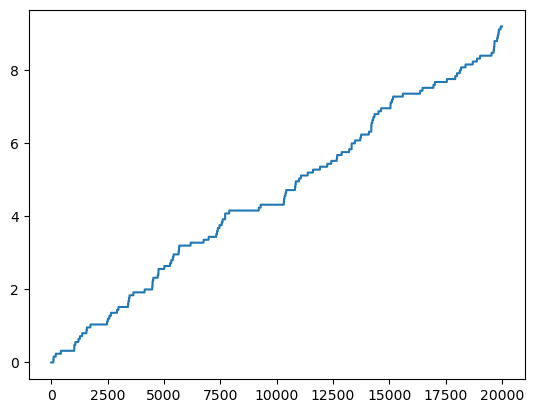

In [6]:
plt.plot(regrets.mean(axis=0))

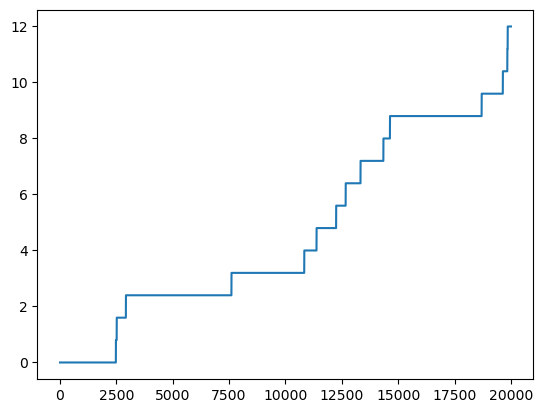

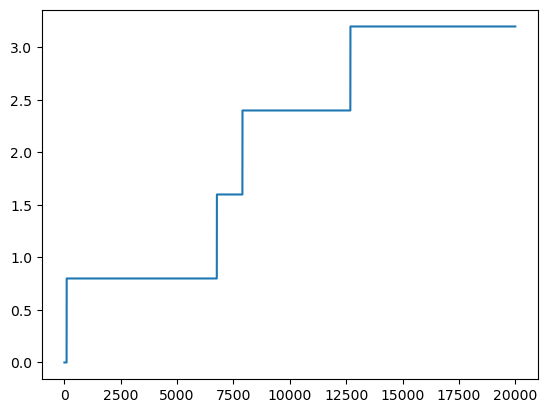

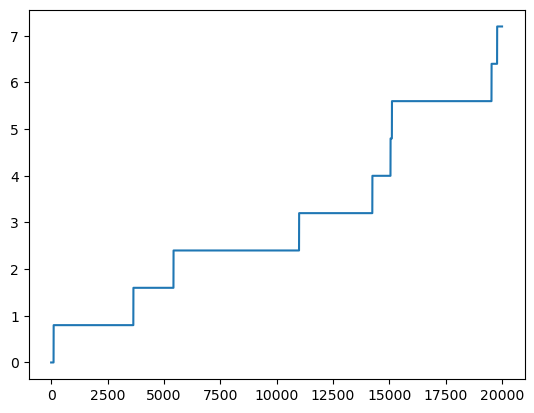

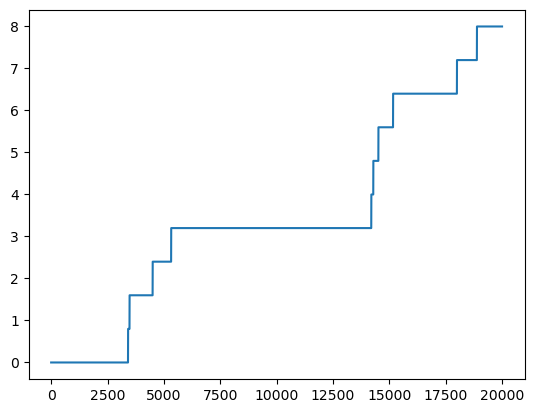

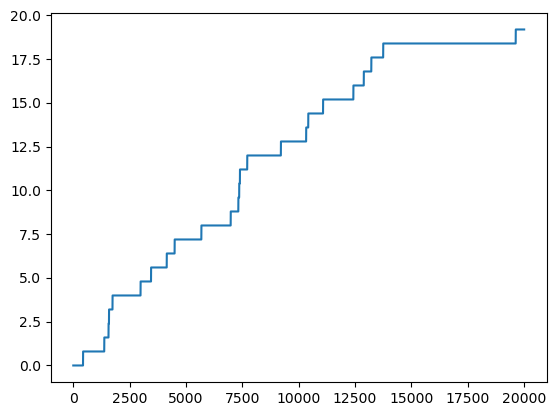

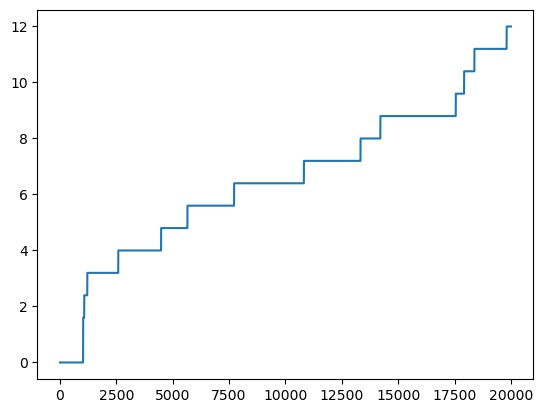

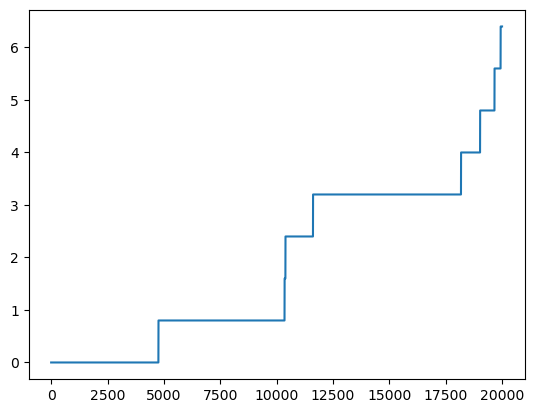

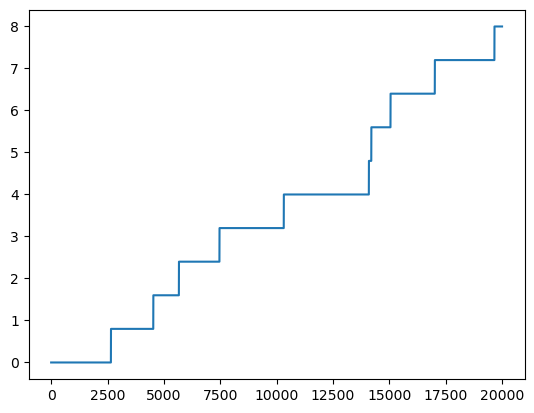

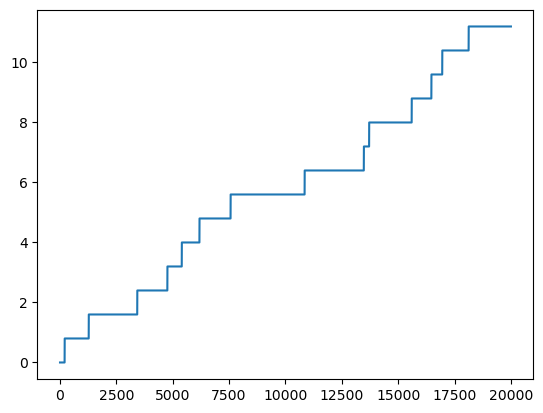

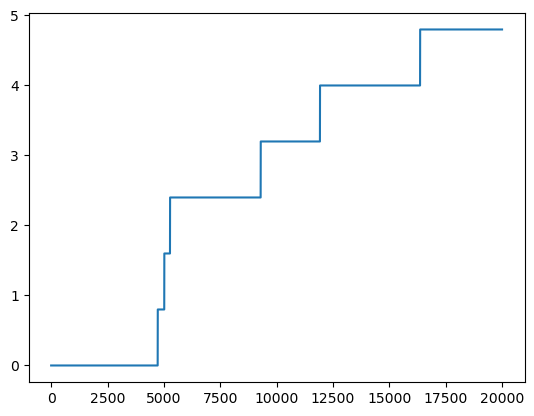

In [7]:
for reg in regrets:
    plt.plot(reg)
    plt.show()

In [8]:
# play 100 times, save and plot regret
import matplotlib.pyplot as plt

turns = 1_000
N = 10

regrets = np.zeros((N, turns + 1))

for i in range(N):
    regret = np.zeros(turns + 1)
    obs = env.reset()
    env.p_list = np.array([0.9, 0.1])
    done = False
    while not done:
        action, _ = model.predict(obs)
        obs, result, done, info = env.step(action)
        regret[info["turn"] - 1] = info["regret"]
        done = info["turn"] > turns
    regrets[i] = regret

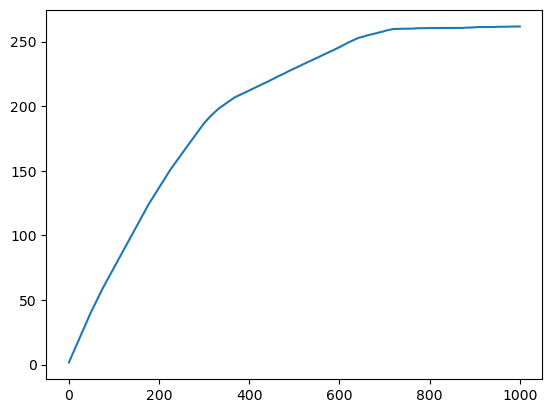

In [9]:
plt.plot(regrets.mean(axis=0))

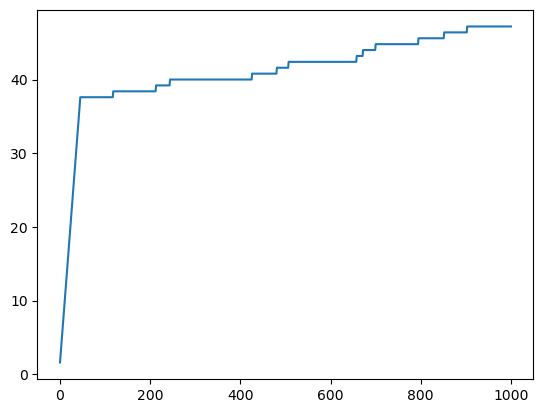

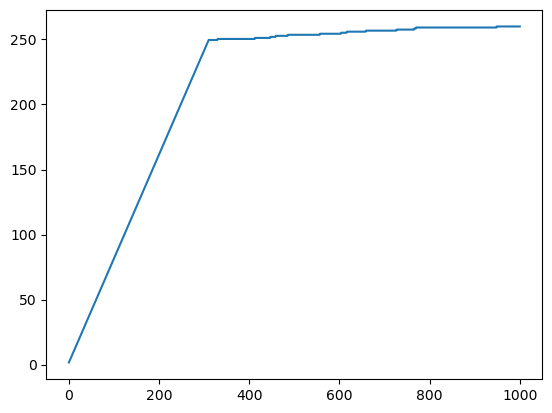

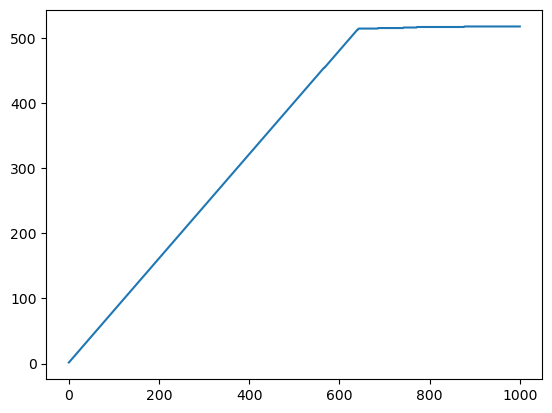

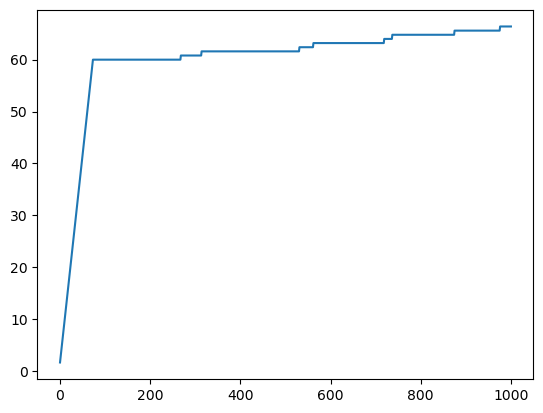

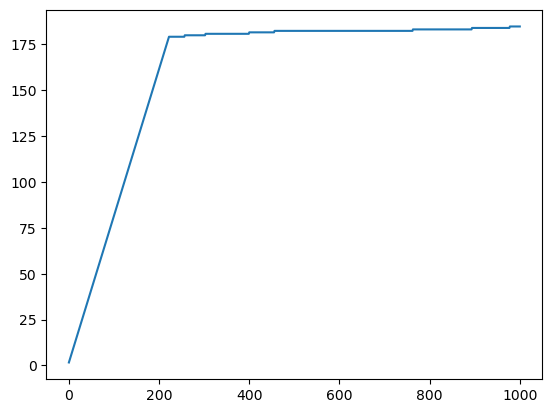

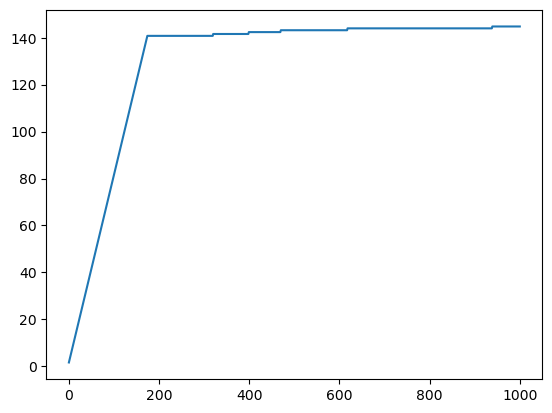

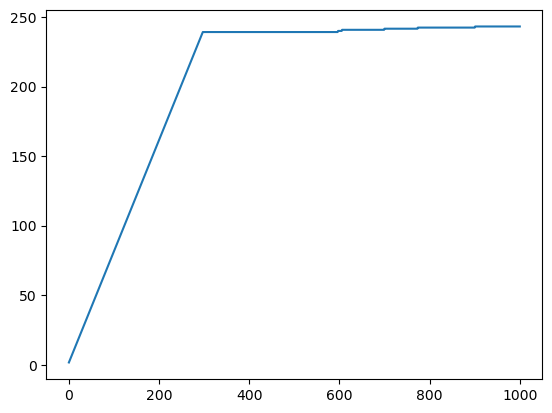

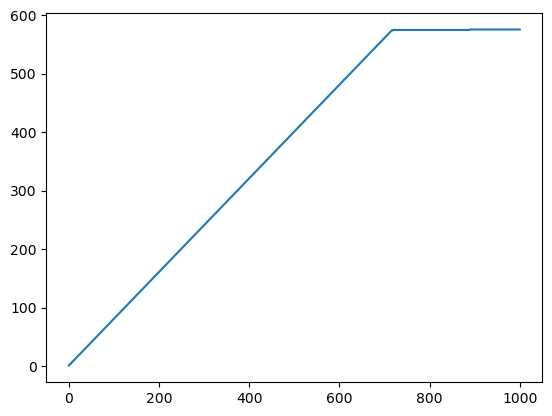

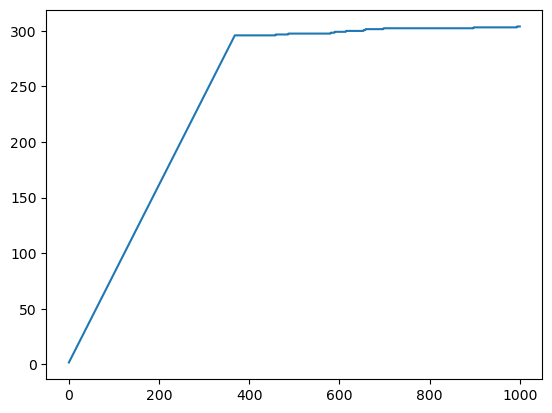

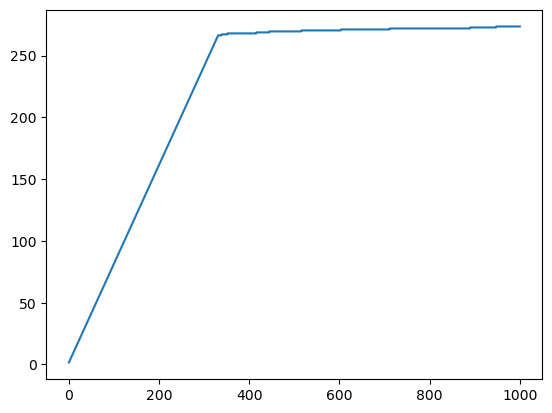

In [10]:
for reg in regrets:
    plt.plot(reg)
    plt.show()